# Project no. 1 - Piotr Damrych - 04.2023

# N queens problem

## General info

The n queens problem is the problem of placing n queens on an n × n chessboard so that no two queens threaten each other, i.e. no two queens can be on the same row, column or diagonal.

There are solutions for all natural numbers n except n = 2 and n = 3.

## Genetic algorithm 

A genetic algorithm is a search heuristic that is inspired by Charles Darwin’s theory of natural evolution. This algorithm reflects the process of natural selection where the fittest individuals are selected for reproduction in order to produce offspring of the next generation.

## Particle swarm optimization

Particle swarm optimization (PSO) is one of the bio-inspired algorithms and it is a simple one to search for an optimal solution in the solution space. Each particle's movement is influenced by its local best known position, but is also guided toward the best known positions in the search-space, which are updated as better positions are found by other particles. This is expected to move the swarm toward the best solutions. 

## Libraries 

We use several libraries to solve this problem. We use numpy, pandas, time, matplotlib and libraries to implement the algorithms. For genetic algorithm (GA) we use pygad and for particle swarm optimization (PSO) we use pyswarms.

In [2]:
import pygad
import numpy as np
import time
import pyswarms as ps
from pyswarms.utils.plotters import plot_cost_history
import matplotlib.pyplot as plt

# GA

## Helper functions no. 1

The first helper function is the createBoard function, which, given an integer n, creates an array of n x n arrays filled with zeros.

In [3]:
n = 8

def createBoard(n: int) -> list[list[int]]:
    return np.zeros((n, n), dtype=int)

boardToShow = createBoard(n)
print("Board:\n", boardToShow)

Board:
 [[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


## Fitness function and helper functions no. 2

The fulfillBoard function is a function that, after receiving the table of solutions with genes (chromosome), inserts ones in the places of zeros where the solution indicates the place of the queen.

The checkCollision function is a function that checks whether there is any collision for the given chessboard and the given column and row values - another queen's attack. The function must check if there is another queen in the same row, column or diagonal.

The fitness function is a function that determines how many attacks occur on a given board. Initially, it receives tables with genes as input (chromosome), then it creates a new board with the help of a helper function and puts queens on the board in places given by genes. Then it iterates through the whole thing and checks the number of attacks. At the end it returns the number of attacks * -1, since our maximum is 0 - when no queen is attacked. This function is crucial to find the best solution for the genetic algorithm and solve our problem.

In [4]:
def fulfillBoard(solution: list[int]) -> list[list[int]]:
    board = createBoard(n)
    
    for i in range(len(solution)):
        x = solution[i]
        board[i][x] = 1

    return board

def checkColission(row: int, col: int, board: list[list[int]]) -> bool:
    n = len(board)
    
    # Check row and column
    if sum(board[row]) > 1 or sum([board[i][col] for i in range(n)]) > 1:
        return True
    
    # Check diagonal
    for i, j in zip(range(row, -1, -1), range(col, -1, -1)):
        if board[i][j] == 1 and (i, j) != (row, col):
            return True
    for i, j in zip(range(row, n), range(col, -1, -1)):
        if board[i][j] == 1 and (i, j) != (row, col):
            return True
    
    return False

def fitness_func(solution, solution_idx):
    newSol = solution.astype(int)
    attacks = 0
    board = fulfillBoard(newSol)

    for i in range(len(board)):
        for j in range(len(board[i])):
            if board[i][j] == 1:
                if checkColission(i, j, board):
                    attacks += 1
                    
    board = createBoard(n)
    return (attacks * -1)

fitness_function = fitness_func

## Helper functions no. 3 and gene space

The functions printResult and printAverages are functions that allow us to print the output of our results in a nice way.

The ga_instance_generate function creates instances of the genetic algorithm.
It gives us:
- gene_space, which is what our gene looks like. It is a number from 0 to n and determines the index of the column in which our queen will be located. The row index is the index of the number in the array, because queens can't be on the same row anyway, it's just a way to avoid it at the beginning,

- num_generations, i.e. the number of generations. For us it is 400,

- num_parents_mating, i.e. number of solutions to be selected as parents. We set 150,

- fitness_func, which is our previous fitness function,

- sol_per_pop, i.e. number of solutions (i.e. chromosomes) within the population. This parameter has no action if initial_population parameter exists. For us it is 450,

- num_genes, i.e. number of genes in the solution/chromosome. We need n queens, so that's n,

- parent_selection_type, i.e. parent selection type. Supported types are sss (for steady-state selection), rws (for roulette wheel selection), sus (for stochastic universal selection), rank (for rank selection), random (for random selection), and tournament (for tournament selection). We use sss,

- keep_parents, i.e. number of parents to keep in the current population. For us it's 60,

- crossover_type, i.e. type of the crossover operation. We use single_point,

- mutation_type - type of the mutation operation. We use random,

- mutation_percent_genes, i.e. percentage of genes to mutate. We use 8 percent,

- stop_criteria, i.e. when our algorithm should stop working. Our algorithm terminates when it finds the maximum, i.e. 0, and when it does not improve its solution after 200 generations.

In [5]:
def printResult(solution, solution_fitness):
    print("Parameters of the best solution : {solution}".format(solution=solution.astype(int)))
    print("Fitness value of the best solution = {solution_fitness}".format(
        solution_fitness=solution_fitness))

def printAverages(times, generations, solved):
    average_time = 0
    for time in times:
        average_time += time
    average_time = average_time / len(times)
    print("Average time (sec): ", average_time)

    average_gen = 0
    for gen in generations:
        average_gen += gen
    average_gen = average_gen / len(generations)
    print("Average number of generations ", average_gen)

    print(f"GA solved {solved}/100")


def ga_instance_generate(n): 
    #sss=steady, rws=roulette, rank, tournament
    parent_selection_type = "sss"
    crossover_type = "single_point"
    mutation_type = "random"
    mutation_percent_genes = 8
    gene_space = np.arange(n)
    sol_per_pop = 450
    num_genes = n
    num_parents_mating = 150
    num_generations = 400
    keep_parents = 60
    return pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       stop_criteria=["reach_0", "saturate_200"])

## Small input no. 1

We perform our first test on n = 1. As you can see, our algorithm found a solution right away without any problems, which is a good sign.

c:\Users\Piotr Damrych\AppData\Local\Programs\Python\Python311\Lib\site-packages\pygad\pygad.py:522: UserWarning: The percentage of genes to mutate (mutation_percent_genes=8) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))


Parameters of the best solution : [0]
Fitness value of the best solution = 0


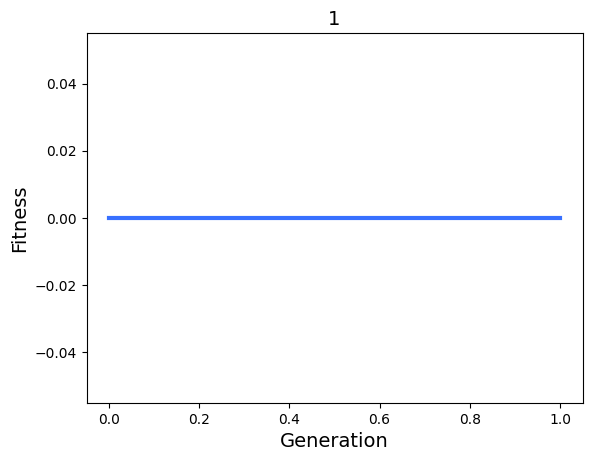

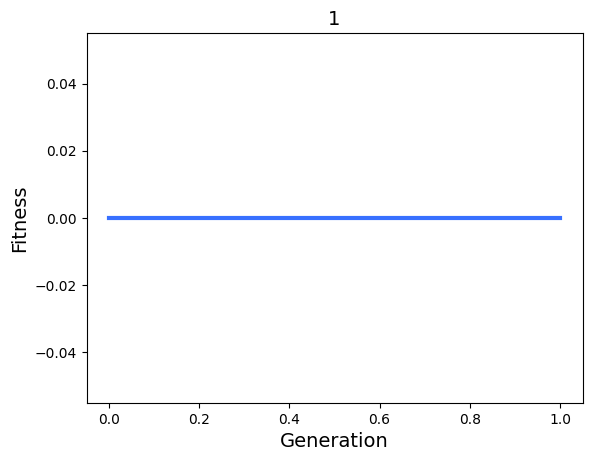

In [6]:
n = 1

ga_instance = ga_instance_generate(n)

ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
printResult(solution, solution_fitness)

ga_instance.plot_fitness(n)

## Small input no. 2

The second test was performed on n = 2, which is one of the exceptions for which there is no solution. As you can see, our algorithm didn't find it either (which is also a good sign).

Parameters of the best solution : [0 1]
Fitness value of the best solution = -1


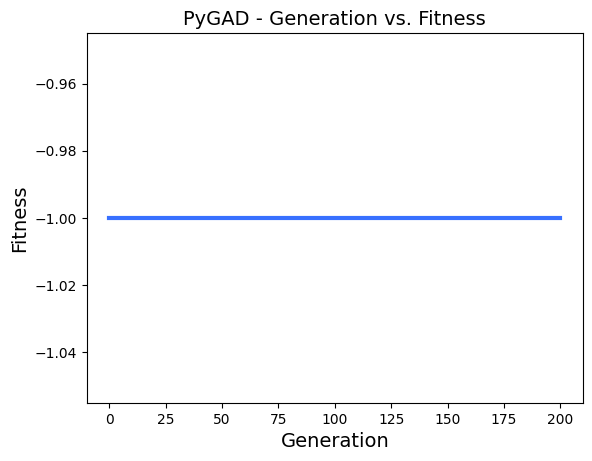

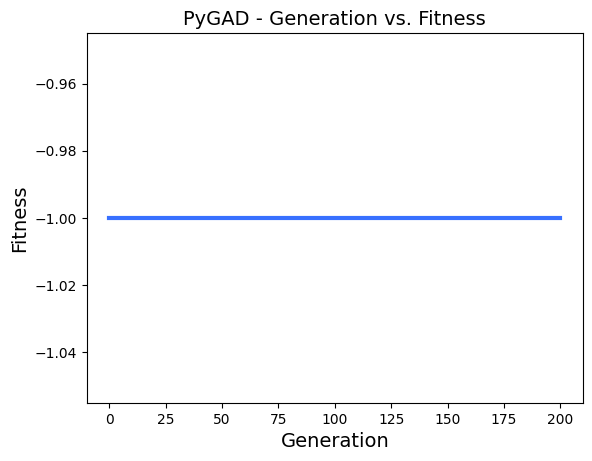

In [13]:
n = 2

ga_instance = ga_instance_generate(n)

ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution.astype(int)))
print("Fitness value of the best solution = {solution_fitness}".format(
    solution_fitness=solution_fitness))

ga_instance.plot_fitness()

## Small input no. 3

We carried out the next, third test on input n = 5. Our algorithm also found a solution without any problems.

Parameters of the best solution : [2 4 1 3 0]
Fitness value of the best solution = 0


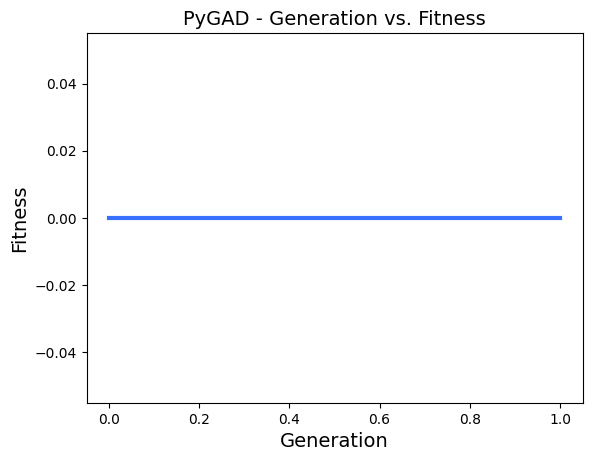

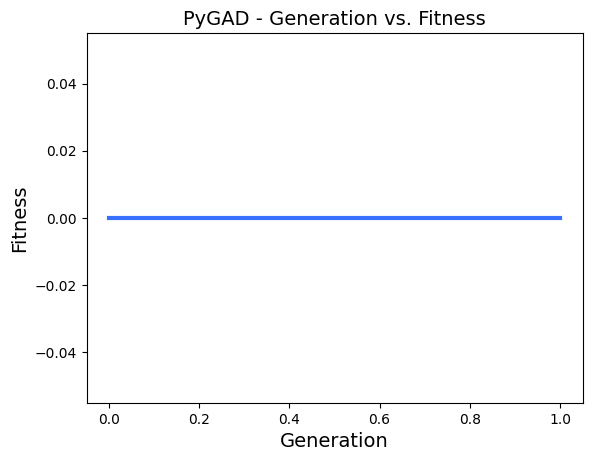

In [14]:
n = 5

ga_instance = ga_instance_generate(n)

ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
printResult(solution, solution_fitness)

ga_instance.plot_fitness()

## Medium input no. 1

The next, fourth input, the most popular for the problem, i.e. n = 8. Our algorithm found a solution without any problem, already in about 25 generations.

Parameters of the best solution : [6 0 2 7 5 3 1 4]
Fitness value of the best solution = 0


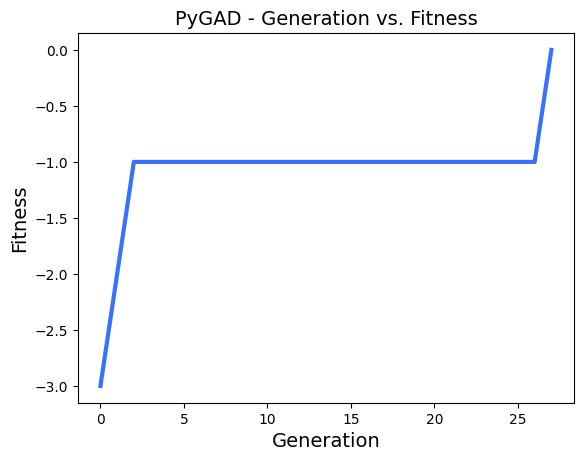

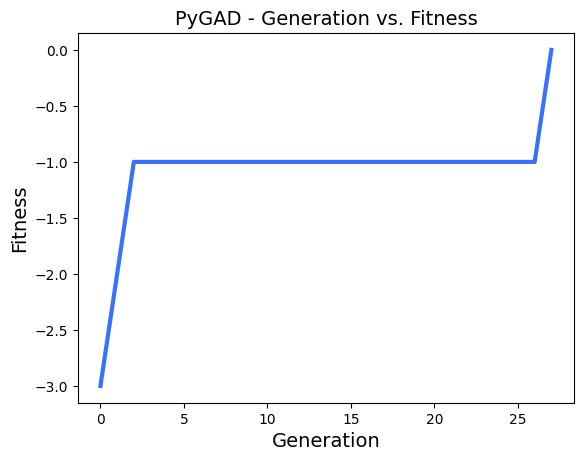

In [15]:
n = 8

ga_instance = ga_instance_generate(n)

ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
printResult(solution, solution_fitness)

ga_instance.plot_fitness()

## Medium input no. 2

We conducted the fifth test on a slightly larger input, n = 12. Our algorithm found a solution, but it required > 100 generations.

Parameters of the best solution : [ 3 10  8  1 11  7  2  0  5  9  4  6]
Fitness value of the best solution = 0


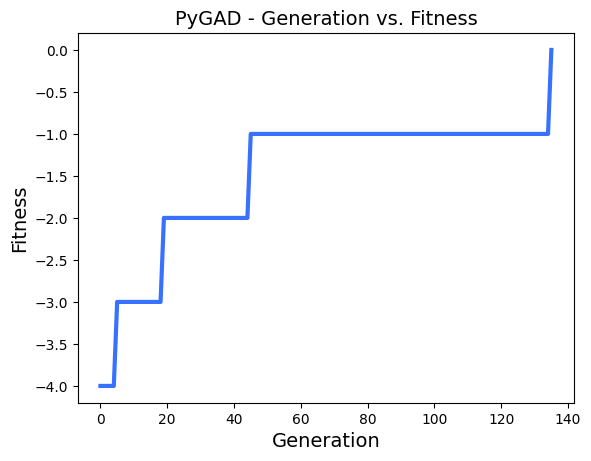

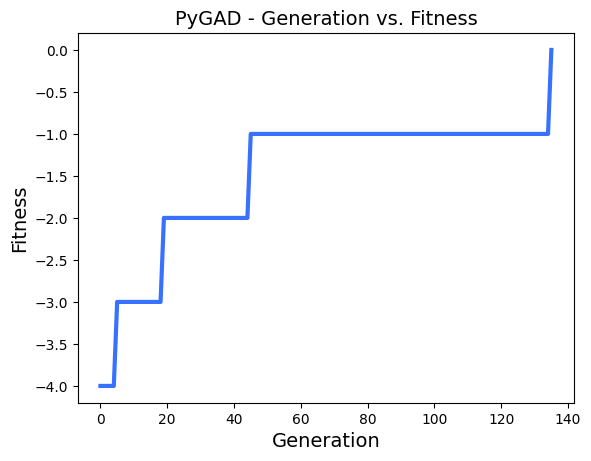

In [206]:
n = 12

ga_instance = ga_instance_generate(n)

ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
printResult(solution, solution_fitness)

ga_instance.plot_fitness()

## Medium input no. 3

We conducted the last test for medium inputs on n = 14. Our algorithm surprisingly found a solution faster than for n = 12, but this is probably just a coincidence. A good sign, however, is that there is no problem finding a valid solution for an already large enough input.

Parameters of the best solution : [ 4  2 11  9  1  5  8 12  7  0 13  6 10  3]
Fitness value of the best solution = 0


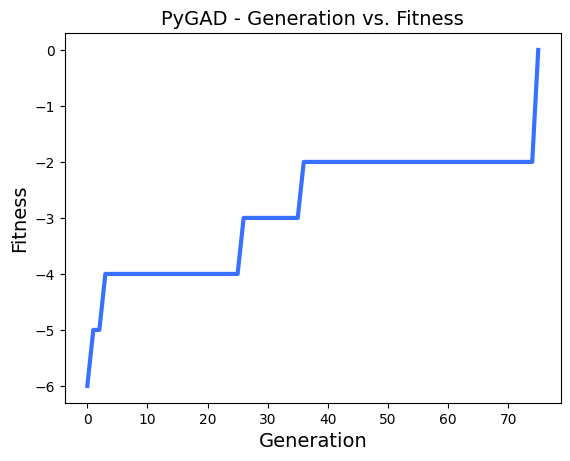

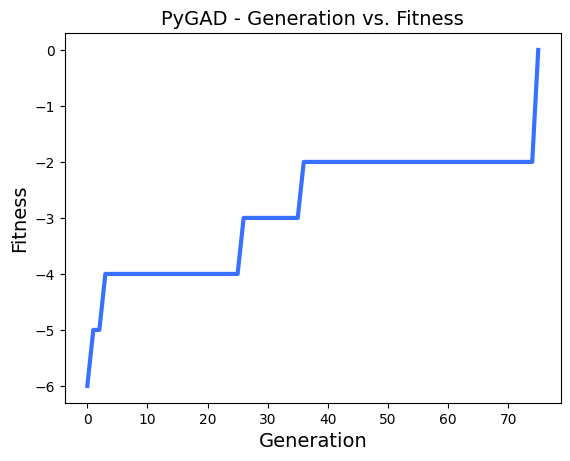

In [203]:
n = 14

ga_instance = ga_instance_generate(n)

ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
printResult(solution, solution_fitness)

ga_instance.plot_fitness()

## Big input no. 1

We conducted our first big input test, the seventh in total, on n = 18. This is already quite a large chess board. Our algorithm also dealt with it without any major problems and found a solution after about 100 generations. The graph shows how beautifully our algorithm climbed up.

Parameters of the best solution : [10 13  6  1 11  7  3  0 16  9 15 12  8  4 17 14  5  2]
Fitness value of the best solution = 0


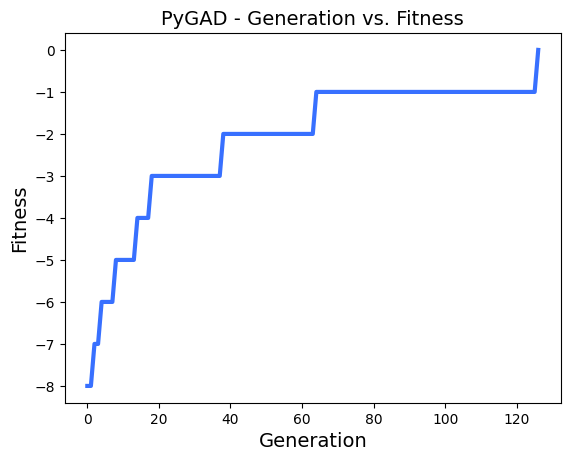

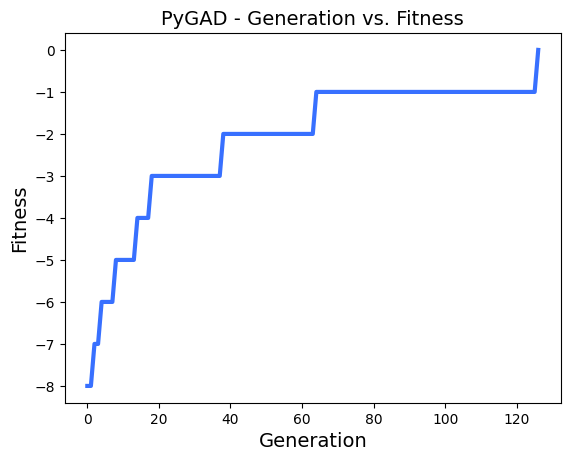

In [178]:
n = 18

ga_instance = ga_instance_generate(n)

ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
printResult(solution, solution_fitness)

ga_instance.plot_fitness()

## Big input no. 2

The eighth test for n = 20. Here our algorithm starts to have more frequent problems and no longer finds the maximum in most trials. However, we found a solution after 80 generations.

Parameters of the best solution : [ 0 18 12  5  9 11 19  2  4 13 17 10  3  7 15  8 14  1  6 16]
Fitness value of the best solution = 0


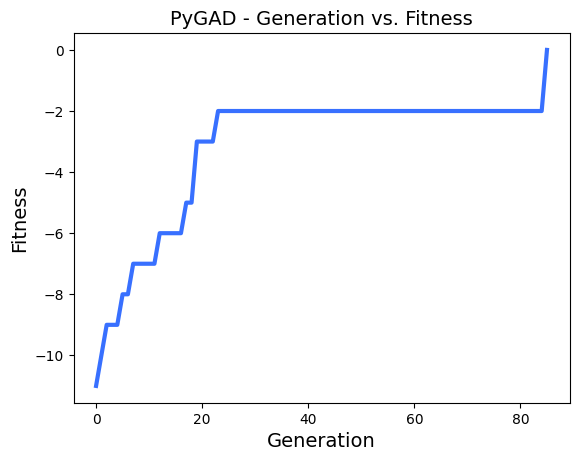

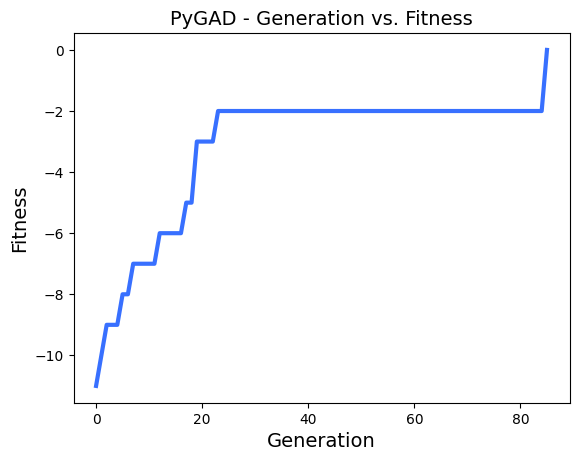

In [135]:
n = 20

ga_instance = ga_instance_generate(n)

ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
printResult(solution, solution_fitness)

ga_instance.plot_fitness()

## Big input no. 3

The last test for n = 21. Here, unfortunately, our algorithm did not find good solutions in most of the tests, similar to n = 20, but this is a really large input. However, we found a solution after about 80 generations. The graph shows how beautifully our algorithm searched for new maxima of the function.

Parameters of the best solution : [13 16  0 12  7 17  6 11  1 14  4 18  9  3 20 10 15 19  2  5  8]
Fitness value of the best solution = 0


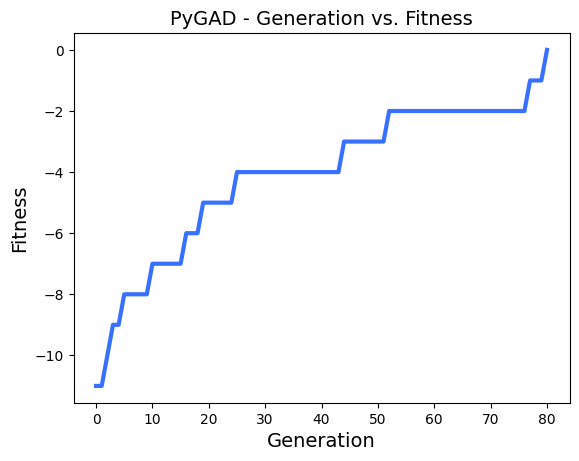

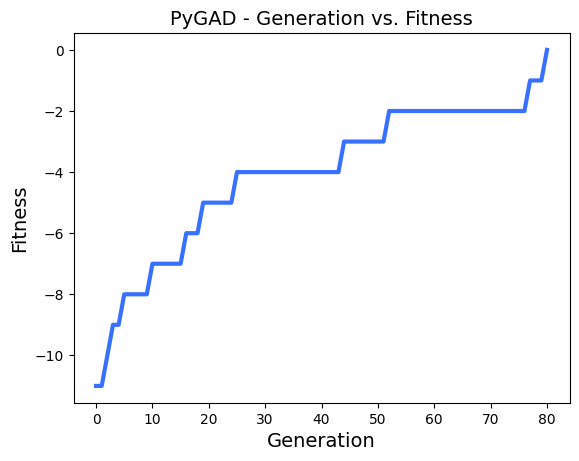

In [173]:
n = 21

ga_instance = ga_instance_generate(n)

ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
printResult(solution, solution_fitness)

ga_instance.plot_fitness()

## Tests

100-sample tests for our algorithm. They check how many percent our algorithm solves well and the average search time.

## Small input test

We conducted the first test for n = 5. Our algorithm finds 100% of solutions in an average time of approximately 0.06 seconds. He succeeds in an average of about 1 generation.

In [16]:
n = 5

times = []
generations = []
solved = 0
for i in range(100):
    start = time.time()
    ga_instance = ga_instance_generate(n)
    
    ga_instance.run()
    end = time.time()
    times.append(end - start)
    generations.append(ga_instance.generations_completed)
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    
    if solution_fitness == 0:
        solved += 1
    
printAverages(times, generations, solved)

Average time (sec):  0.06435400247573853
Average number of generations  1.04
GA solved 100/100


## Medium input test

We conducted another test for n = 10. Our algorithm finds 86% of solutions in an average time of approximately 7 seconds. It manages to do so on average 100 generations.

In [207]:
n = 10

times = []
generations = []
solved = 0
for i in range(100):
    start = time.time()
    ga_instance = ga_instance_generate(n)
    
    ga_instance.run()
    end = time.time()
    times.append(end - start)
    generations.append(ga_instance.generations_completed)
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    
    if solution_fitness == 0:
        solved += 1
    
printAverages(times, generations, solved)

Average time (sec):  7.108049712181091
Average number of generations  101.08
GA solved 86/100


## Big input test

We conducted the last test for n = 16. Our algorithm finds 53% of solutions in an average time of approximately 28 seconds. He succeeds in an average of about 188 generations.

In [208]:
n = 16

times = []
generations = []
solved = 0
for i in range(100):
    start = time.time()
    ga_instance = ga_instance_generate(n)
    
    ga_instance.run()
    end = time.time()
    times.append(end - start)
    generations.append(ga_instance.generations_completed)
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    
    if solution_fitness == 0:
        solved += 1
    
printAverages(times, generations, solved)

Average time (sec):  28.87527069091797
Average number of generations  188.19
GA solved 53/100


## PSO

## Fitness and helper functions

The fitness function is exactly the same function that was used for the genetic algorithm (it uses the same helper functions), but it does not accept 2 parameters, but only a solution table, which we convert to integer at the very beginning, because the pyswarms package uses floating point numbers.

The function f is a helper function that inserts only one table of solutions from the table of solutions into the fitness function. We use "-" before the fitness function to find the maximum.

The generate_optimizer function is the generate function of the pso optimizer. We set in it:
- options, that is, a dictionary containing the parameters for the specific optimization technique. We use the default

- bounds, i.e., a tuple of size 2 where the first entry is the minimum bound while the second entry is the maximum bound, for us minimum bound is an array of n lengths of all zeros, and maximum bound is an array of length n with only n values,

- n_particles, i.e. the number of particles in the swarm. We use 20,

- dimensions, i.e. number of dimensions in the space. We use n.

In [8]:
def fitness_func(solution):
    newSol = solution.astype(int)
    attacks = 0
    board = fulfillBoard(newSol)

    for i in range(len(board)):
        for j in range(len(board[i])):
            if board[i][j] == 1:
                if checkColission(i, j, board):
                    attacks += 1
                    
    board = createBoard(n)
    return (attacks * -1)

def f(x):
    n_particles = x.shape[0]
    j = [-fitness_func(x[i]) for i in range(n_particles)]
    return np.array(j).astype(int)

def generate_optimizer(n):
    options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

    x_max = np.full((n,), n)
    x_min = np.zeros(n)
    my_bounds = (x_min, x_max)

    return ps.single.GlobalBestPSO(n_particles=20, dimensions=n,
    options=options, bounds=my_bounds)

## Small input no. 1

The first input is n = 1. Our algorithm handled it without any problem.

2023-04-07 18:59:32,361 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0
2023-04-07 18:59:34,060 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0, best pos: [0.46826359]


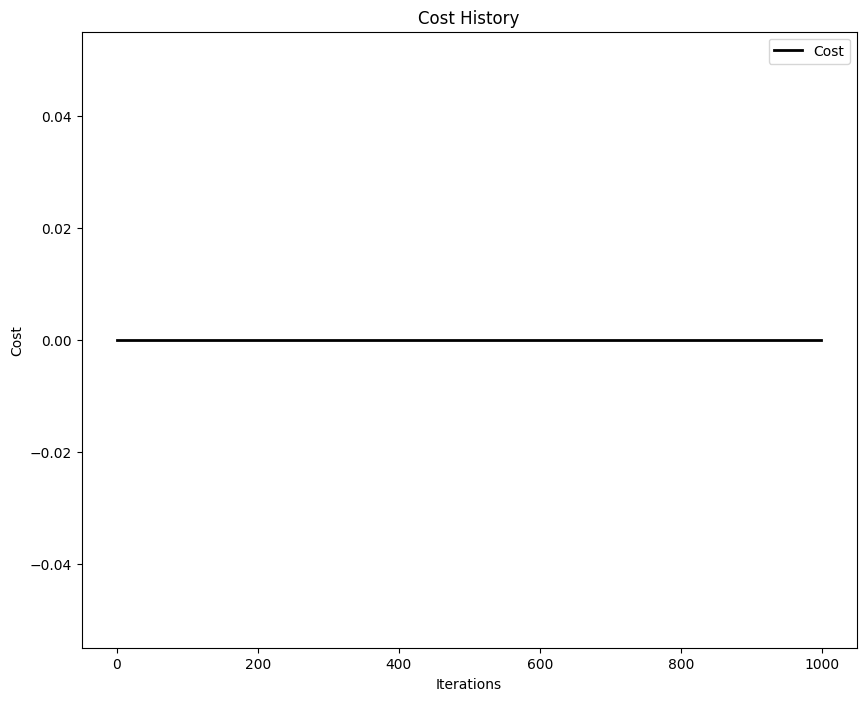

In [9]:
n = 1
optimizer = generate_optimizer(n)
optimizer.optimize(f, iters=1000)
cost_history = optimizer.cost_history
plot_cost_history(cost_history)
plt.show()

## Small input no. 2

The next input is n = 2, which is an exception. Our algorithm didn't solve it, which is a good sign.

2023-04-07 18:59:37,798 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=1
2023-04-07 18:59:39,493 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.0, best pos: [1.53409238 0.07243081]


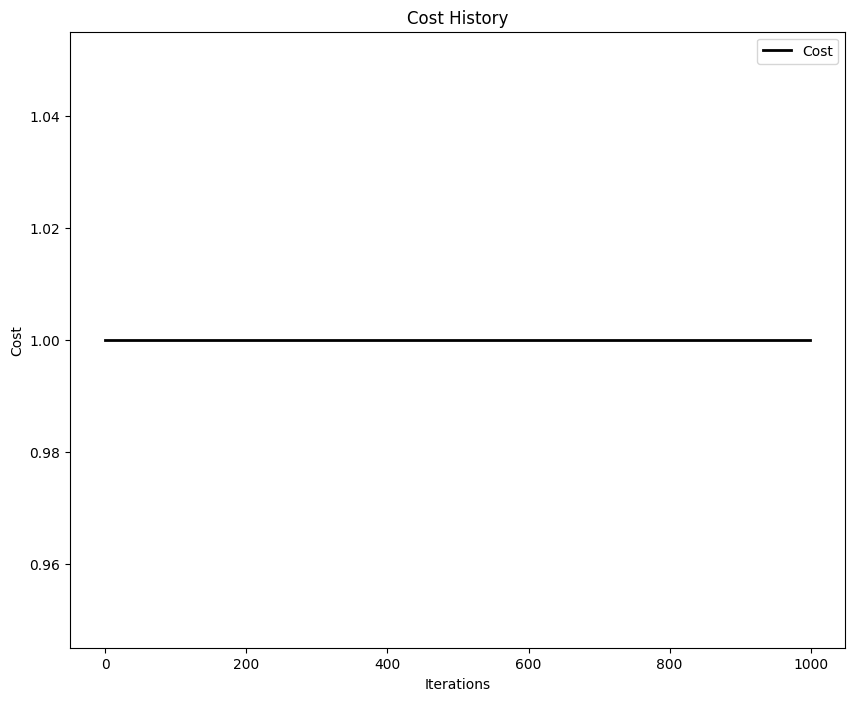

In [10]:
n = 2
optimizer = generate_optimizer(n)
optimizer.optimize(f, iters=1000)
cost_history = optimizer.cost_history
plot_cost_history(cost_history)
plt.show()

## Small input no. 3

The last small input is n = 5. Our algorithm quickly found a good solution.

2023-04-07 18:59:40,385 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0
2023-04-07 18:59:42,620 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0, best pos: [0.76119335 3.11512474 1.00035776 4.79005471 2.83803338]


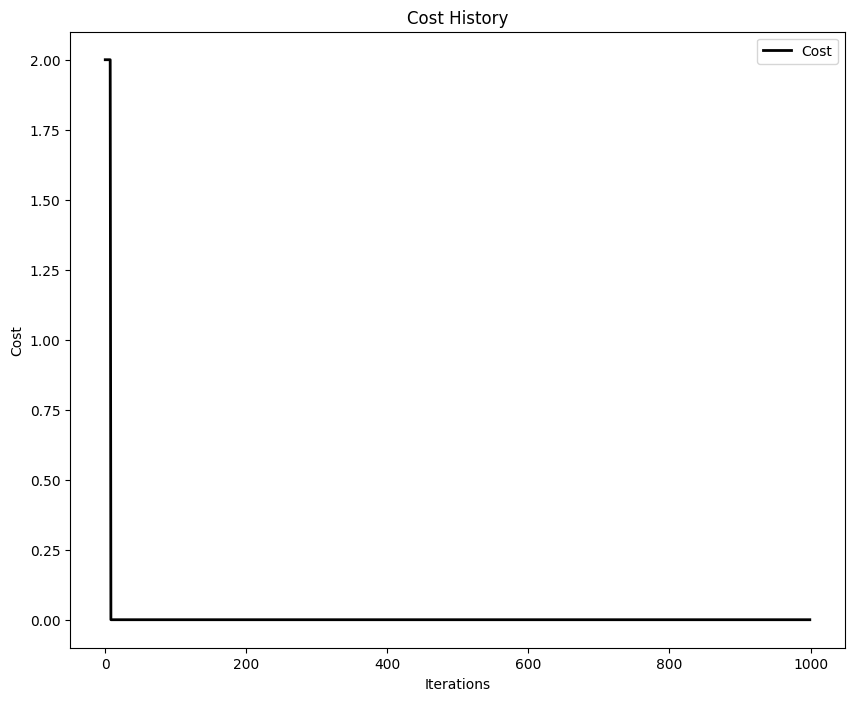

In [11]:
n = 5
optimizer = generate_optimizer(n)
optimizer.optimize(f, iters=1000)
cost_history = optimizer.cost_history
plot_cost_history(cost_history)
plt.show()

## Medium input no. 1

The fourth input is n = 7. Our algorithm still works and will find a solution after about 100 iterations.

2023-04-07 19:00:46,626 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0
2023-04-07 19:00:49,254 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0, best pos: [2.895432   5.02931994 1.2107059  4.83211181 0.85698802 3.59071043
 6.20367047]


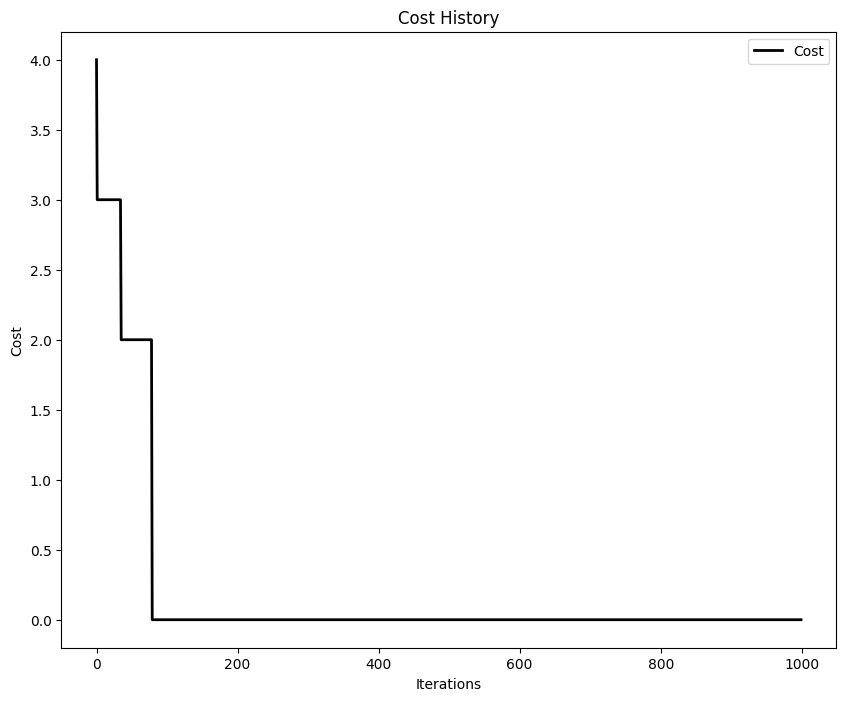

In [25]:
n = 7
optimizer = generate_optimizer(n)
optimizer.optimize(f, iters=1000)
cost_history = optimizer.cost_history
plot_cost_history(cost_history)
plt.show()

## Medium input no. 2

The next input is n = 8. Our algorithm still finds a solution, but the graph shows that it takes many more iterations.

2023-04-07 19:00:39,749 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0
2023-04-07 19:00:42,703 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0, best pos: [6.77255121 2.86051894 7.09846247 1.58970394 4.1967417  0.24649502
 5.4041038  3.08400947]


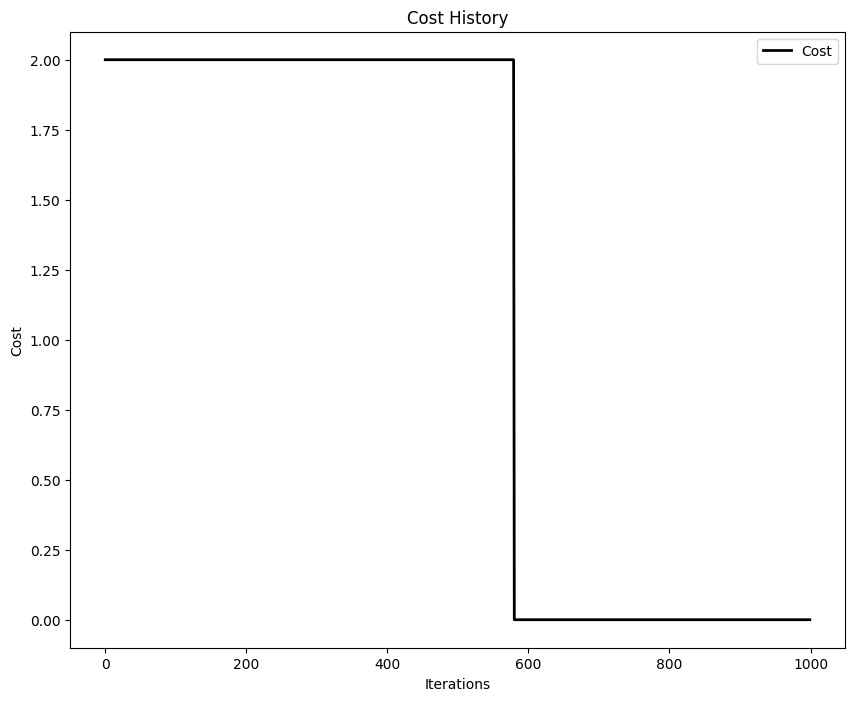

In [24]:
n = 8
optimizer = generate_optimizer(n)
optimizer.optimize(f, iters=1000)
cost_history = optimizer.cost_history
plot_cost_history(cost_history)
plt.show()

## Medium input no. 3

The last medium input is n = 9. The algorithm still finds a solution, even faster than for n = 8, which is of course random. However, you can see the differences and the first suspicions that pso will not solve our problem as well as ag.

2023-04-07 19:01:36,892 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0
2023-04-07 19:01:41,341 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0, best pos: [1.53697515 5.67814771 0.43172223 2.71117228 6.58373559 8.32451062
 3.63290102 7.12193594 4.45218577]


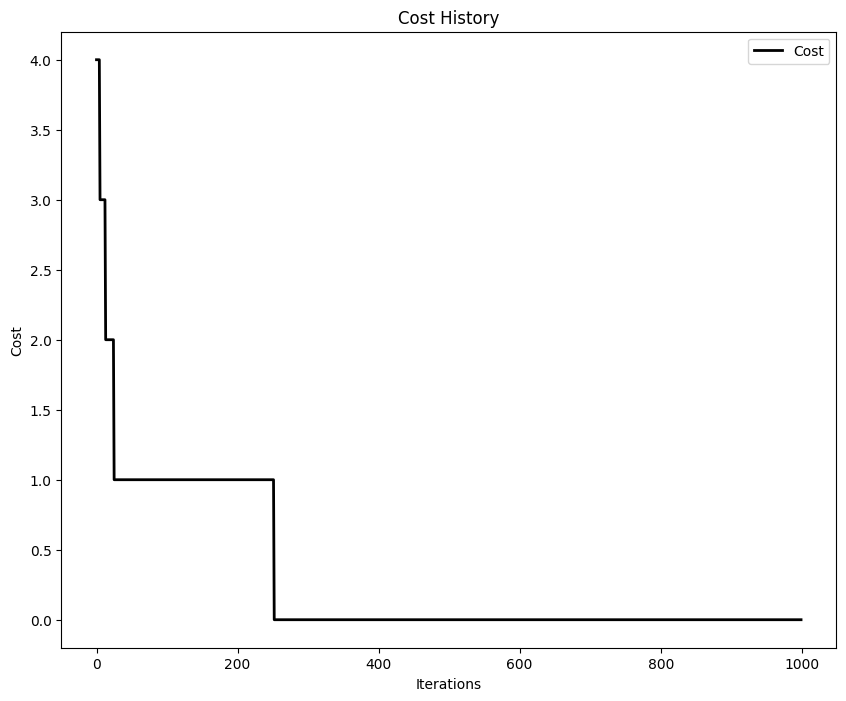

In [35]:
n = 9
optimizer = generate_optimizer(n)
optimizer.optimize(f, iters=1000)
cost_history = optimizer.cost_history
plot_cost_history(cost_history)
plt.show()

## Big input no. 1, 2, 3

Unfortunately, our algorithm cannot cope with any of the larger inputs, i.e. n = 12, n = 13, n = 15. You can see that it is much weaker than our genetic algorithm.

2023-04-07 19:01:44,901 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=3
2023-04-07 19:01:49,947 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.0, best pos: [ 3.57774921  1.26970425  4.87955127  2.41673486  9.82264245  6.67858761
  8.04597854  5.09612814  8.30725383  0.64397957  7.28277332 11.4139461 ]


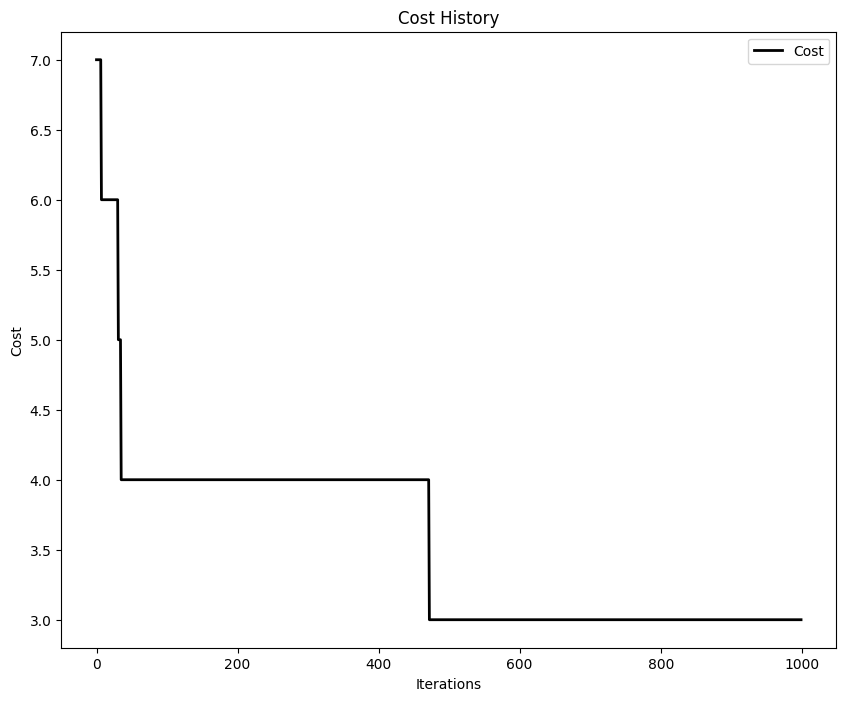

In [36]:
n = 12
optimizer = generate_optimizer(n)
optimizer.optimize(f, iters=1000)
cost_history = optimizer.cost_history
plot_cost_history(cost_history)
plt.show()

2023-04-07 19:01:54,214 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=3
2023-04-07 19:02:00,041 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.0, best pos: [ 0.69465295  9.5742524   1.53805862  8.52594985 11.02082886  3.52890511
  6.87060737  6.36828665  6.79102563  5.61232019  7.85129201 12.15078854
  4.38851284]


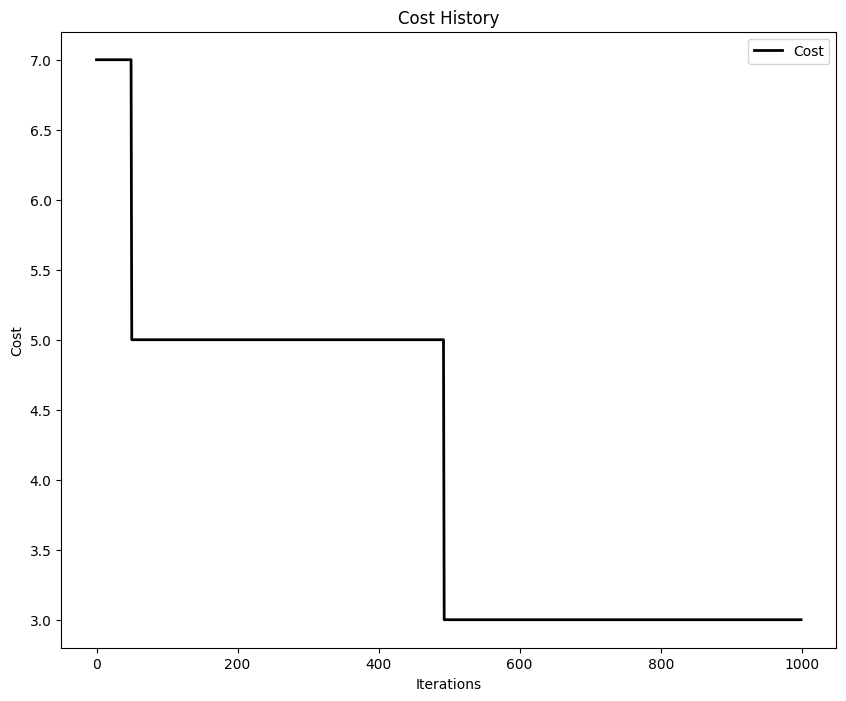

In [37]:
n = 13
optimizer = generate_optimizer(n)
optimizer.optimize(f, iters=1000)
cost_history = optimizer.cost_history
plot_cost_history(cost_history)
plt.show()

2023-04-07 19:02:01,071 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=3
2023-04-07 19:02:08,319 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.0, best pos: [ 6.49131674  1.83190743  7.81132278  5.10537628 11.49017428  8.44109654
  4.74530325 12.08987684  4.91689559  3.24225179  9.98265369  0.69216227
 13.1155534  10.05134555  2.33323626]


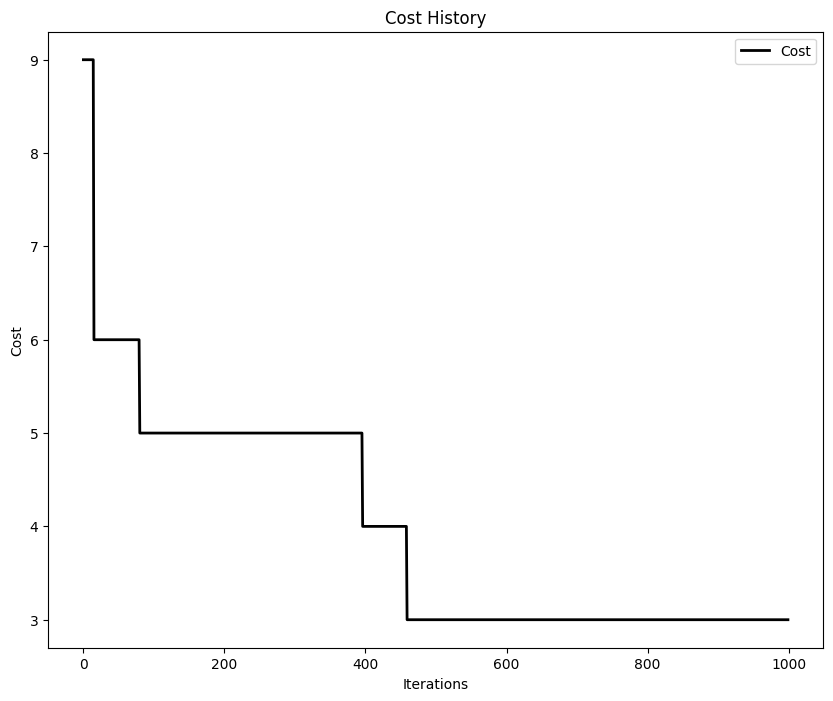

In [38]:
n = 15
optimizer = generate_optimizer(n)
optimizer.optimize(f, iters=1000)
cost_history = optimizer.cost_history
plot_cost_history(cost_history)
plt.show()

## Helper functions

The printAverages function is a function that presents the results in a nice way.

In [39]:
def printAverages(times, solved):
    average_time = 0
    for time in times:
        average_time += time
    average_time = average_time / len(times)
    print("Average time (sec): ", average_time)

    print(f"PSO solved {solved}/100")

## Tests

100-sample tests for our algorithm. They check how many percent our algorithm solves well and the average search time.

## Small input test

We conducted the first test for n = 5. Our algorithm finds 100% of solutions in an average time of approximately 0.6 seconds.

In [40]:
n = 5

times = []
generations = []
solved = 0
for i in range(100):
    start = time.time()
    optimizer = generate_optimizer(n)
    
    cost, _ = optimizer.optimize(f, iters=200)
    end = time.time()
    times.append(end - start)
    
    if cost == 0.0:
        solved += 1
    
printAverages(times, solved)

2023-04-07 19:02:17,164 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=0
2023-04-07 19:02:17,624 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0, best pos: [0.85236647 3.85141042 1.29134466 4.03404249 2.74879426]
2023-04-07 19:02:17,634 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=0
2023-04-07 19:02:18,106 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0, best pos: [3.96252073 0.63449856 2.76579545 4.10722106 1.29739636]
2023-04-07 19:02:18,113 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=0
2023-04-07 19:02:18,570 - pyswarms.single.global_best - INFO - Optimization finished | bes

Average time (sec):  0.612137746810913
PSO solved 100/100


## Medium input test

We conducted another test for n = 8. Our algorithm finds only 21% of solutions in an average time of approximately 4.3 seconds.

In [41]:
n = 8

times = []
generations = []
solved = 0
for i in range(100):
    start = time.time()
    optimizer = generate_optimizer(n)
    
    cost, _ = optimizer.optimize(f, iters=1000)
    end = time.time()
    times.append(end - start)
    
    if cost == 0.0:
        solved += 1
    
printAverages(times, solved)

2023-04-07 19:04:19,801 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=1
2023-04-07 19:04:22,773 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.0, best pos: [2.81532313 7.2643764  5.24512018 1.14813623 6.10212341 4.33596176
 0.74134511 3.84174222]
2023-04-07 19:04:22,781 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=1
2023-04-07 19:04:25,728 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.0, best pos: [2.21599974 5.40675675 7.62135484 4.27740569 0.52283499 3.80740864
 6.61998492 1.99046952]
2023-04-07 19:04:25,741 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=2
2023-04-07 19

Average time (sec):  4.322767145633698
PSO solved 21/100


## Medium input test no. 2

We conducted another medium input test for n = 10. Our algorithm finds only 2% of solutions in an average time of approximately 5.2 seconds. For comparison, the genetic algorithm for the same input found 86% of correct solutions.

In [42]:
n = 10

times = []
generations = []
solved = 0
for i in range(100):
    start = time.time()
    optimizer = generate_optimizer(n)
    
    cost, _ = optimizer.optimize(f, iters=1000)
    end = time.time()
    times.append(end - start)
    
    if cost == 0.0:
        solved += 1
    
printAverages(times, solved)

2023-04-07 19:12:51,562 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=2
2023-04-07 19:12:55,005 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.0, best pos: [7.45959248 5.51686193 8.76244498 2.59259731 7.94219293 3.28875843
 6.06205755 4.33649436 9.90337751 0.65360247]
2023-04-07 19:12:55,011 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=3
2023-04-07 19:12:58,414 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.0, best pos: [1.23597675 4.86155189 9.38815499 3.0082694  4.5391849  4.41101632
 8.02359968 0.05415364 2.41866462 6.27493602]
2023-04-07 19:12:58,423 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|███

Average time (sec):  5.627781248092651
PSO solved 2/100


## Big input test

I carried out the test for large inputs for n = 12. It is actually a medium-sized input, but I suspected that the algorithm would not be able to handle it anymore. Unfortunately, I was right and our algorithm found 0% correct answers. The genetic algorithm is much better for this problem.

In [43]:
n = 12

times = []
generations = []
solved = 0
for i in range(100):
    start = time.time()
    optimizer = generate_optimizer(n)
    
    cost, _ = optimizer.optimize(f, iters=1000)
    end = time.time()
    times.append(end - start)
    
    if cost == 0.0:
        solved += 1
    
printAverages(times, solved)

2023-04-07 19:24:08,157 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=2
2023-04-07 19:24:12,629 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.0, best pos: [ 7.39805672  3.32364829 11.45932027  6.61684286  4.96862463  1.43015777
  5.64575341  0.67519456  7.94540542 10.55648699  2.79168896  9.03283262]
2023-04-07 19:24:12,637 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=3
2023-04-07 19:24:17,162 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.0, best pos: [ 6.22226497  4.32197245  2.17637188  8.39619253  3.66326128  3.29709483
  7.61274886  0.43123483 10.33558001  1.68067127  9.06447979  5.59326313]
2023-04-07 19:24:17,169 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'

Average time (sec):  6.50140148639679
PSO solved 0/100


## Summary

Summing up the tests, the genetic algorithm fits the n queens problem much better than PSO. GA found really good solutions in a fairly short time and even for large inputs it kept about 50% of the correctness of the solutions, while PSO could not cope with them at all.

## Bibliography

- https://pyswarms.readthedocs.io/en/latest/api/pyswarms.single.html
- https://en.wikipedia.org/wiki/Particle_swarm_optimization
- https://en.wikipedia.org/wiki/Eight_queens_puzzle
- https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html#pygad-ga-class
- https://en.wikipedia.org/wiki/Genetic_algorithm
- https://towardsdatascience.com/introduction-to-genetic-algorithms-including-example-code-e396e98d8bf3
- https://machinelearningmastery.com/a-gentle-introduction-to-particle-swarm-optimization/